___
# Ciência dos Dados - PROJETO 1

## Roberto Franco
___

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Roberto Franco\Documents\Insper\ciencia dos dados\GIT\Ciencia_dos_dados


In [4]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [5]:
dados_2013 = pd.read_excel('DOM_2013.xlsx')

In [6]:
#dados_2013.dtypes

In [7]:
dados_2013.tail()


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column90,Column91,Column92,Column93,Column94,Column95,Column96,Column97,Column98,Column99
148693,148692.0,2013,53,2148,13,1,3.0,2.0,1.0,2.0,...,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,20150428
148694,148693.0,2013,53,2148,14,1,1.0,1.0,1.0,2.0,...,1.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,20150428
148695,148694.0,2013,53,2148,15,1,4.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150428
148696,148695.0,2013,53,2148,16,1,2.0,1.0,1.0,2.0,...,1.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,20150428
148697,148696.0,2013,53,2148,17,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150428


In [91]:
#dados_2013 = dados_2013[dados_2013.Column78==999999999999.0]


In [9]:

DR_2013 = dados_2013.loc[1:,["Column1","Column3","Column29","Column50","Column56","Column57","Column58","Column78"]]

DR_2013 = DR_2013[DR_2013.Column78!=999999999999]

DR_2013.head()

,Column1,Column3,Column29,Column50,Column56,Column57,Column58,Column78
1,0.0,11,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,11,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,11,2.0,4.0,NaN,NaN,NaN,350.0
4,3.0,11,2.0,4.0,NaN,NaN,NaN,339.0
5,4.0,11,2.0,4.0,NaN,NaN,NaN,266.0


In [10]:
DR_2013.Column1 = DR_2013.Column1.astype('category')
DR_2013.Column3 = DR_2013.Column3.astype('category')
DR_2013.Column29 = DR_2013.Column29.astype('category')
DR_2013.Column50 = DR_2013.Column50.astype('category')
DR_2013.Column56 = DR_2013.Column56.astype('category')
DR_2013.Column57 = DR_2013.Column57.astype('category')
DR_2013.Column58 = DR_2013.Column58.astype('category')
DR_2013.Column78 = DR_2013.Column78.astype('float')



In [11]:
DR_2013.columns = ["NUMERO","UF", "CELULAR", "NET_DOM", "NET_3G","NET_TEL","NET_BL","RENDA"]

In [12]:
DR_2013

,NUMERO,UF,CELULAR,NET_DOM,NET_3G,NET_TEL,NET_BL,RENDA
1,0.0,11,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,11,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,11,2.0,4.0,NaN,NaN,NaN,3.500000e+02
4,3.0,11,2.0,4.0,NaN,NaN,NaN,3.390000e+02
5,4.0,11,2.0,4.0,NaN,NaN,NaN,2.660000e+02
6,5.0,11,2.0,4.0,NaN,NaN,NaN,4.000000e+02
7,6.0,11,2.0,4.0,NaN,NaN,NaN,4.110000e+02
8,7.0,11,2.0,2.0,2.0,2.0,2.0,1.333000e+03
9,8.0,11,2.0,2.0,2.0,2.0,4.0,1.750000e+03
10,9.0,11,2.0,2.0,4.0,4.0,2.0,1.300000e+03


In [14]:
DR_2013.CELULAR.cat.categories = (['Sim', 'Nao'])
DR_2013.NET_DOM.cat.categories = (["Sim","Nao"])
DR_2013.NET_3G.cat.categories = (["Sim","Nao"])
DR_2013.NET_TEL.cat.categories = (["Sim","Nao"])
DR_2013.NET_BL.cat.categories = (["Sim","Nao"])


In [15]:
DR_2013.to_csv("Dados_resumidos_2013") # salvar excel

In [16]:
DR_2013[DR_2013.CELULAR == "Sim"].head()

,NUMERO,UF,CELULAR,NET_DOM,NET_3G,NET_TEL,NET_BL,RENDA
3,2.0,11,Sim,Nao,NaN,NaN,NaN,350.0
4,3.0,11,Sim,Nao,NaN,NaN,NaN,339.0
5,4.0,11,Sim,Nao,NaN,NaN,NaN,266.0
6,5.0,11,Sim,Nao,NaN,NaN,NaN,400.0
7,6.0,11,Sim,Nao,NaN,NaN,NaN,411.0


In [17]:
DR_2013.CELULAR.value_counts() # quantos tem celular no Brasil

Sim    104921
Nao     11271
Name: CELULAR, dtype: int64

In [18]:
DR_2013.CELULAR.value_counts(True)*100 # porcentagem

Sim    90.299676
Nao     9.700324
Name: CELULAR, dtype: float64

In [19]:
ct_celular= pd.crosstab(DR_2013.UF, DR_2013.CELULAR) 

ct_celular_por= pd.crosstab(DR_2013.UF, DR_2013.CELULAR,normalize="index") # porcentagem por estado 

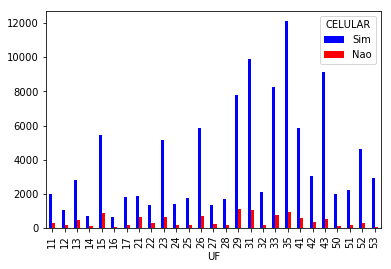

In [20]:
ct_celular.plot(kind='bar', color=('blue', 'red'),legend=True)

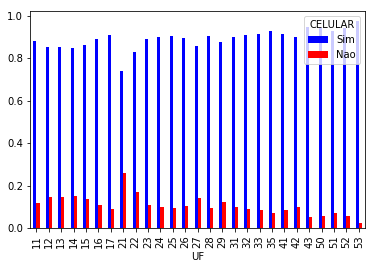

In [21]:
ct_celular_por.plot(kind='bar', color=('blue', 'red'),legend=True) # em porcentagem 

In [22]:
ct_net_dom = pd.crosstab(DR_2013.UF, DR_2013.NET_DOM)

ct_net_dom_por= pd.crosstab(DR_2013.UF, DR_2013.NET_DOM,normalize="index") # porcentagem por estado 

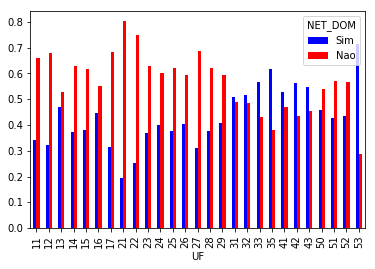

In [23]:
ct_net_dom_por.plot(kind='bar', color=('blue', 'red'),legend=True) # em porcentagem 

In [57]:


#faixa = range(0,82000,1000)
faixa = [0, 500, 1000, 2000, 5000, 10000, 20000, 82000]
RENDA_cat = pd.cut(DR_2013.RENDA, bins=faixa)



#ct_net_renda = pd.crosstab(DR_2013.NET_DOM, DR_2013.faixas_renda)
 
#ct_net_renda

RENDA_FAIXA = RENDA_cat.value_counts()
#RENDA_FAIXA
#ct_renda_net = pd.crosstab(DR_2013.UF, DR_2013.NET_DOM)

In [58]:
DR_2013["FAIXA_RENDA"] = RENDA_cat

In [59]:
ct_renda_net = pd.crosstab(DR_2013.FAIXA_RENDA, DR_2013.NET_DOM)

ct_renda_net 
#pegar a porcetagem relativa de cada estado, para poder comparar!

#baixo uso de internet ? pq? cruzar com renda e ver o resultado

# cruzar com trabalho de servicos, e ver se causou um aumento 

NET_DOM,Sim,Nao
FAIXA_RENDA,,
"(0, 500]",11995,27043
"(500, 1000]",16138,20122
"(1000, 2000]",12782,8055
"(2000, 5000]",7543,1967
"(5000, 10000]",1980,249
"(10000, 20000]",529,44
"(20000, 82000]",78,12


In [ ]:
# fazer porcentagem 

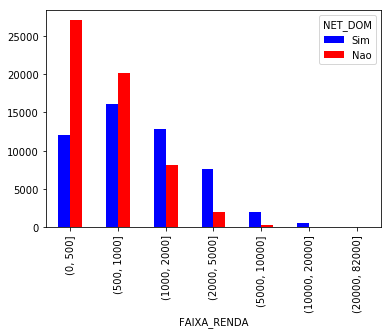

In [62]:
ct_renda_net.plot(kind='bar', color=('blue', 'red'),legend=True)

___
## Conclusão 

Descreva aqui suas conclusões!